# 1 On the computation of π
1.1 Asking the maths library
My computer tells me that π is approximatively


In [1]:
from math import *
print(pi)


3.141592653589793


# 1.2 Buffon’s needle
Applying the method of Buffon’s needle, we get the approximation


In [2]:
import numpy as np
np.random.seed(seed=42)
N = 10000
x = np.random.uniform(size=N, low=0, high=1)
theta = np.random.uniform(size=N, low=0, high=pi/2)
2/(sum((x+np.sin(theta))>1)/N)


3.128911138923655

# 1.3 Using a surface fraction argument
A method that is easier to understand and does not make use of the sin function is based on the
fact that if X ∼ U(0, 1) and Y ∼ U(0, 1), then P[X2 + Y2 ≤ 1] = π/4 .
The following code uses this approach:



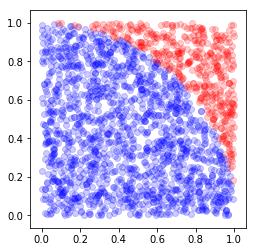

In [9]:
import matplotlib.pyplot as plt
np.random.seed(seed=30)
N = 2000
x = np.random.uniform(size=N, low=0, high=1)
y = np.random.uniform(size=N, low=0, high=1)
accept = (x*x+y*y) <= 1
reject = np.logical_not(accept)
fig, ax = plt.subplots(1)
ax.scatter(x[accept], y[accept], c='b', alpha=0.2, edgecolor=None)
ax.scatter(x[reject], y[reject], c='r', alpha=0.2, edgecolor=None)
ax.set_aspect('equal')


In [4]:
4*np.mean(accept)

3.122

# 1.4 Écrire le lien "aiguilles de Buffon" vers wikipedia

In [5]:
## [Aiguilles de Buffon](https://fr.wikipedia.org/wiki/Aiguilles_de_Buffon)  c'est la syntaxe pour avoir le resultats suivant :

[Aiguilles de Buffon](https://fr.wikipedia.org/wiki/Aiguilles_de_Buffon)

# 1.5  Écrire le code de la méthode de Buffon pour Python et pour R

In [6]:
import random

def buffon_needle(num_needles):
    count_crossed = 0
    for _ in range(num_needles):
        # Générez une longueur aléatoire de l'aiguille
        needle_length = random.uniform(0, 1)
        # Générez une position aléatoire pour le centre de l'aiguille
        needle_center = random.uniform(0, 1 / (2 * needle_length))
        # Vérifiez si l'aiguille croise une ligne
        if needle_center < needle_length / 2 or needle_center > 1 - (needle_length / 2):
            count_crossed += 1

    # Estimez pi en utilisant la formule de Buffon
    pi_estimate = (2 * num_needles) / count_crossed if count_crossed > 0 else 0
    return pi_estimate

# Nombre d'aiguilles à lancer
num_needles = 100000
pi_estimate = buffon_needle(num_needles)
print(pi_estimate)

2.9873039581777445


# 1.5 ECRIRE DANS LE LANGUAGE R

In [7]:
%reload_ext rpy2.ipython

In [8]:
%%R

buffon_needle <- function(num_needles) {
  count_crossed <- 0
  for (i in 1:num_needles) {
    # Générez une longueur aléatoire de l'aiguille
    needle_length <- runif(1, 0, 1)
    # Générez une position aléatoire pour le centre de l'aiguille
    needle_center <- runif(1, 0, 1 / (2 * needle_length))
    # Vérifiez si l'aiguille croise une ligne
    if (needle_center < needle_length / 2 || needle_center > 1 - (needle_length / 2)) {
      count_crossed <- count_crossed + 1
    }
  }

  # Estimez pi en utilisant la formule de Buffon
  pi_estimate <- (2 * num_needles) / count_crossed
  return(pi_estimate)
}

# Nombre d'aiguilles à lancer
num_needles <- 100000
pi_estimate <- buffon_needle(num_needles)
pi_estimate

[1] 3.003138
